## Notebook de apresentação de análise do dataset

### Importação dos pacotes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.io.json import json_normalize

### Lendo o dataset e os arquivos que possuem o resultado da análise de sentimento

In [6]:
df_dataset = pd.read_json('http://tiagodemelo.info/datasets/dataset-v2.dat', lines=True)
#df_dataset = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/dados/dataset.csv', index_col=0)
df_comentarios = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/subjectivity-polarity-comentary.csv', index_col=0)
df_sentencas = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/subjectivity-polarity-sentences.csv', index_col=0)

Definindo valores que indicam as subjetividade e polaridades

In [7]:
SUBJETIVIDADE = 0.28  # Objetivo < SUBJETIVIDADE | Opinativo >= SUBJETIVIDADE
POLARIDADE_N = 0.15   # Negativo < POLARIDADE_N 
POLARIDADE_P = 0.2    # Positivo >= POLARIDADE_P
                      # [(Neutro >= POLARIDADE_N) e (Neutro < POLARIDADE_P)]

---
# Apresentação dos resultados

## Distribuição dos idiomas utilizados

In [8]:
df_dataset['language'].value_counts()

pt      99128
en        789
None       45
es         17
           17
iw          1
sv          1
it          1
ru          1
Name: language, dtype: int64

## Média de sentenças por comentário

In [9]:
len(df_sentencas)/len(df_dataset)

3.65911

## Distribuição dos comentários e sentenças de acordo com o grau de subjetividade

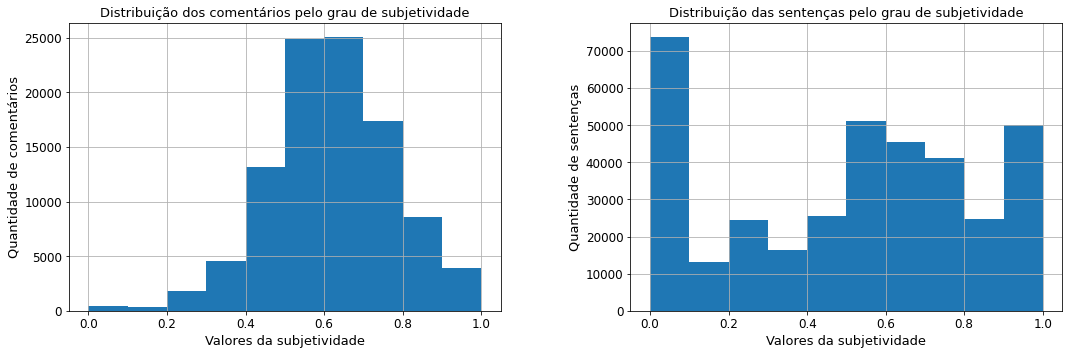

In [10]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 1, 1])
ax.hist(df_comentarios['subjectivity'])
ax.set_title("Distribuição dos comentários pelo grau de subjetividade", fontsize=13)
ax.set_ylabel("Quantidade de comentários", fontsize=13)
ax.set_xlabel("Valores da subjetividade", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()
ax2 = fig.add_axes([1.3, 1, 1, 1])
ax2.hist(df_sentencas['subjectivity'])
ax2.set_title("Distribuição das sentenças pelo grau de subjetividade", fontsize=13)
ax2.set_ylabel("Quantidade de sentenças", fontsize=13)
ax2.set_xlabel("Valores da subjetividade", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.grid()

## Distribuição dos comentários e sentenças de acordo com o grau de polaridade

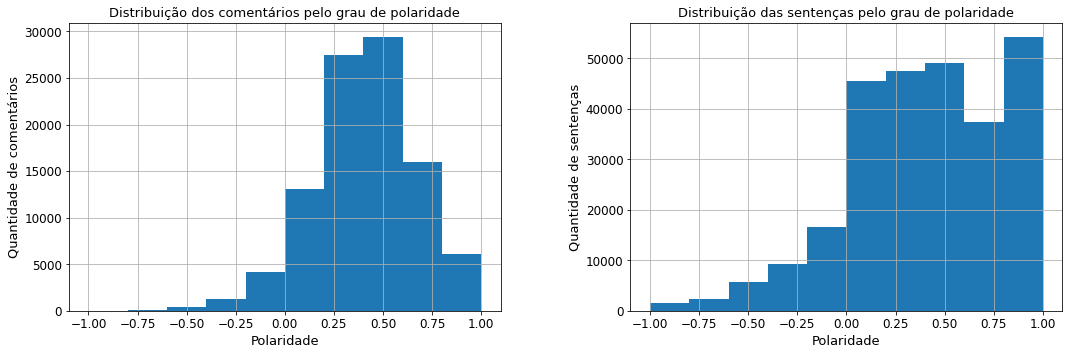

In [11]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 1, 1])
ax.hist(df_comentarios[df_comentarios['subjectivity']>=SUBJETIVIDADE]['polarity'])
ax.set_title("Distribuição dos comentários pelo grau de polaridade", fontsize=13)
ax.set_ylabel("Quantidade de comentários", fontsize=13)
ax.set_xlabel("Polaridade", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()
ax2 = fig.add_axes([1.3, 1, 1, 1])
ax2.hist(df_sentencas[df_sentencas['subjectivity']>=SUBJETIVIDADE]['polarity'])
ax2.set_title("Distribuição das sentenças pelo grau de polaridade", fontsize=13)
ax2.set_ylabel("Quantidade de sentenças", fontsize=13)
ax2.set_xlabel("Polaridade", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.grid()

## Distribuição dos comentários e sentenças de acordo com a subjetividade

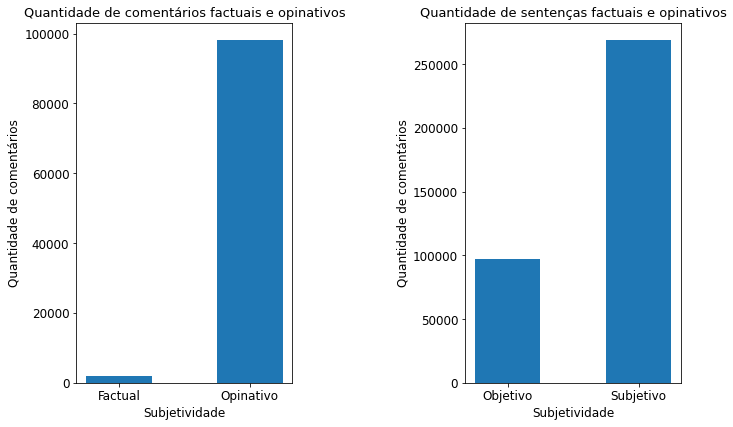

In [12]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 0.5, 1.25])
ax.bar(['Factual','Opinativo'], [len(df_comentarios[df_comentarios['subjectivity']<SUBJETIVIDADE]),len(df_comentarios[df_comentarios['subjectivity']>=SUBJETIVIDADE])], width=0.5)
ax.set_title("Quantidade de comentários factuais e opinativos", fontsize=13)
ax.set_ylabel("Quantidade de comentários", fontsize=12)
ax.set_xlabel("Subjetividade", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_axes([0.9, 1, 0.5 ,1.25])
ax2.bar(['Objetivo','Subjetivo'], [len(df_sentencas[df_sentencas['subjectivity']<SUBJETIVIDADE]),len(df_sentencas[df_sentencas['subjectivity']>=SUBJETIVIDADE])], width=0.5)
ax2.set_title("Quantidade de sentenças factuais e opinativos", fontsize=13)
ax2.set_ylabel("Quantidade de comentários", fontsize=12)
ax2.set_xlabel("Subjetividade", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig.show()

## Distribuição das notas

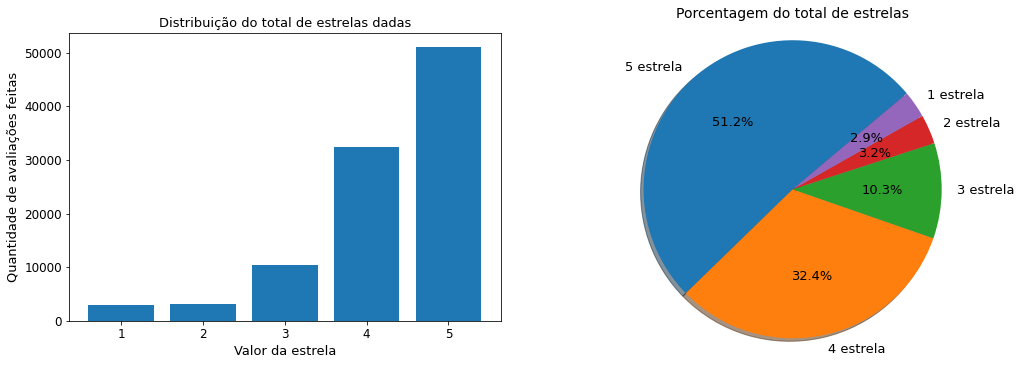

In [13]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 1, 1])
ax.bar(df_dataset['ratingValue'].value_counts().keys(), df_dataset['ratingValue'].value_counts())
ax.set_title("Distribuição do total de estrelas dadas", fontsize=13)
ax.set_ylabel("Quantidade de avaliações feitas", fontsize=13)
ax.set_xlabel("Valor da estrela", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax2 = fig.add_axes([1.15, 0.88, 1.05, 1.15])
ax2.pie(df_dataset['ratingValue'].value_counts(), explode=(0, 0, 0, 0, 0), labels=['5 estrela','4 estrela','3 estrela','2 estrela','1 estrela'], autopct='%1.1f%%', shadow=True, startangle=40, textprops={'size':'13'})
ax2.axis('equal')
ax2.set_title('Porcentagem do total de estrelas', fontsize=14)

#plt.show()
fig.show()

## Quantidade de comentários realizados por ano

In [14]:
sr_datas = pd.to_datetime(df_dataset['publicationDate'], format='%d/%m/%Y').sort_values()
sr_anos = sr_datas.apply(lambda x : x.year)
sr_anos = sr_anos.groupby(by=sr_anos).agg('count')
df_anos = sr_anos.to_frame()

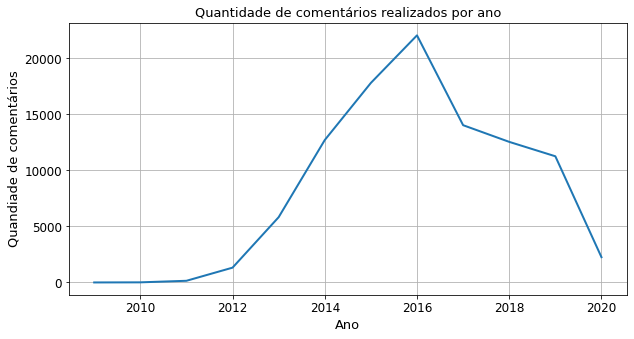

In [15]:
fig, ax = plt.subplots(figsize=[10,5])
ax.plot(list(df_anos.index), list(df_anos['publicationDate']), lw=2)
ax.set_title('Quantidade de comentários realizados por ano', fontsize=13)
ax.set_xlabel('Ano', fontsize=13)
ax.set_ylabel('Quandiade de comentários', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()
fig.show()

## Aparelhos utilizados para fazer o review

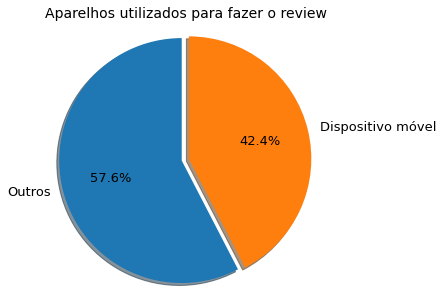

In [16]:

fig, ax1 = plt.subplots(figsize=[5,5])
ax1.pie(df_dataset['mobileDevice'].value_counts(), explode=(0, 0.06), labels=['Outros', 'Dispositivo móvel'], autopct='%1.1f%%', shadow=True, startangle=90, textprops={'size':'13'})
ax1.axis('equal')
ax1.set_title('Aparelhos utilizados para fazer o review', fontsize=14)
plt.show()